https://en.wikipedia.org/wiki/N-end_rule

In [1]:
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
import Bio.Seq
import numpy as np
import seaborn as sns

In [2]:
YeastTable = dict.fromkeys(('M','G','A','S','T','V','P'), 20)
YeastTable.update(dict.fromkeys(('I','E','Z'),0.5))
YeastTable.update(dict.fromkeys(('Y','Q'),1/6))
YeastTable.update(dict.fromkeys(('L','F','D','K'),1/20))
YeastTable.update(dict.fromkeys(('R'),1/30))

YeastTable_k = {}
for key, value in YeastTable.items():
    YeastTable_k[key] = -np.log(1/2)/value

def singledecay_dt(Props, dt, *args, k_dict=YeastTable_k, **kwargs):
    Prop_updates = {}
    for seq, No in Props.items():
        if len(seq) == 1:
            continue
        k1 = k_dict.get(seq[0],0)
        k2 = k_dict.get(seq[-1],0)
        dN1 = -k1*No*dt
        Prop_updates[seq[1:]] = Prop_updates.get(seq[1:],0) - dN1
        dN2 = -k2*No*dt
        Prop_updates[seq[:-1]] = Prop_updates.get(seq[:-1],0) - dN2
        Ntot = No + dN1 + dN2
        Prop_updates[seq] = Prop_updates.get(seq,0) + dN1 + dN2
    for seq, prop in Prop_updates.items():
        Props[seq] = Props.get(seq,0) + prop
    return Props

def decay(seq, t, *args, dt=0.00001, org='yeast', **kwargs):
    Props = {str(seq): 1}
    steps = int(t/dt)
    for step in range(steps):
        Props = singledecay_dt(Props,dt)
#     for key, val in Props.items():
#         Props[key] = '{:0.3e}'.format(val)        
    return Props

#Note: k values assume t is in hours

In [3]:
my_seq = Seq('AQGYPPGE',alphabet=IUPAC.protein)
t = 1
decaydict = decay(str(my_seq),t)

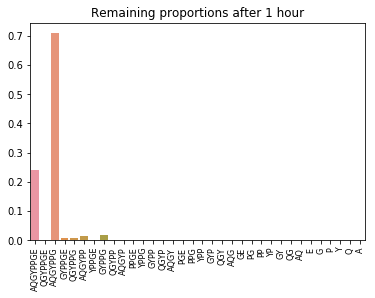

In [4]:
x = list(decaydict.keys())
y = list(decaydict.values())
ax = sns.barplot(x,y)
ax.tick_params(axis='x',rotation=90, labelsize=8)
ax.set_title('Remaining proportions after {} hour{}'.format(t,'s' if t != 1 else ''));

There will be N(N-1) simultaneous decay reactions where N is the length of the protein.

prot = ABC

ln(Nt/No) = -kt

t1/2 = -ln(1/2)/k
    -> k = -ln(1/2)/t1/2
  
  
ABC -> BC
    Nt = No*e^-kt
    NBC = 1-Nt/No
    NBC = 1-e^-kt
    
   